In [1]:
import csv

def process_csv(filename):
    exampleFile = open(filename, encoding="utf-8")
    exampleReader = csv.reader(exampleFile)
    exampleData = list(exampleReader)
    exampleFile.close()
    return exampleData

# use process_csv to pull out the header and data rows
csv_rows = process_csv("Water_Usage_Data.csv")
csv_header = csv_rows[0]
csv_data = csv_rows[1:]

In [2]:
def cell(row_idx, col_name):
    col_idx = csv_header.index(col_name)
    val = csv_data[row_idx][col_idx]
    if val == "":
        return None
    return val

In [3]:
print(csv_header)

['\ufeffdate_applicable', 'total_gallons', 'residential_gallons', 'multi_family_gallons', 'commercial_gallons', 'industrial_gallons', 'public_authority_gallons', 'OBJECTID']


In [4]:
print(csv_data)

[['1/1/2019', '17240452.01', '6896553.991', '4936297.028', '2899003.223', '372027', '2136570.769', '0'], ['1/2/2019', '20204457.43', '7262534.651', '4687956.808', '4954364.353', '538747', '2760854.62', '1'], ['1/3/2019', '19367188.31', '6214681.059', '4649834.954', '5051775.413', '602900', '2847996.884', '2'], ['1/4/2019', '19294498.24', '6032113.704', '4552227.705', '5249283.403', '613821.9999', '2847051.425', '3'], ['1/5/2019', '18073429.03', '6678241.313', '4914119.605', '3844688.871', '430945', '2205434.239', '4'], ['1/6/2019', '18480051.41', '7362307.039', '5283009.904', '3262941.007', '419631', '2152162.456', '5'], ['1/7/2019', '19145869.02', '6236998.092', '4722488.555', '4564497.129', '588871', '3033014.248', '6'], ['1/8/2019', '19727949.89', '6036315.405', '4687061.344', '5082903.605', '612022', '3309647.532', '7'], ['1/9/2019', '19424408.74', '5671551.609', '4699230.638', '5054605.266', '576545.4883', '3422475.734', '8'], ['1/10/2019', '19839308.94', '6152570.24', '4668019.48

In [5]:
rows, cols = (20, 6) 

sum_data = [ [ 0 for i in range(cols) ] for j in range(rows) ]

counter=0
#Sum 10 months
for i in range(0,20):
    
    for j in range(counter,counter+30):
        
        for k in range(1,7):
            
            sum_data[i][k-1]+=float(csv_data[j][k])
            sum_data[i][k-1]=round(sum_data[i][k-1])
            
    counter+=30
sum_data

[[600174412, 204100609, 153492315, 134756146, 15729776, 92095562],
 [626566759, 191978894, 163079723, 143878913, 18163194, 109466040],
 [610557657, 189071526, 144860733, 155066550, 18505097, 103053756],
 [629437040, 191866603, 159446929, 148030531, 19712047, 110380930],
 [656543325, 198324625, 156997697, 156563539, 29279266, 115378200],
 [717763699, 212120748, 156849865, 175636667, 64522728, 108633689],
 [797466410, 222159886, 163079617, 205426567, 78870002, 127930340],
 [861585264, 210192990, 166145843, 297140307, 69016933, 119089194],
 [1626309737, 201679251, 177546820, 200762948, 22255216, 1024065497],
 [1594058476, 207129713, 1067533155, 168553065, 19061756, 131780789],
 [761692703, 201356529, 156058189, 157406415, 17681397, 229190172],
 [606842573, 188799471, 145268523, 150025731, 16643541, 106105305],
 [549339636, 182529354, 142279176, 124138690, 16920812, 83471600],
 [615609050, 188548912, 161597458, 145620525, 19304894, 100537252],
 [606860948, 198657012, 159769025, 131368432, 

In [6]:
percent_data = [ [ 1.0 for i in range(cols) ] for j in range(rows) ]

for i in range(0,20):
    for j in range(1,6):
        percent_data[i][j]=sum_data[i][j]/sum_data[i][0]
#percent_data

In [7]:
sum_data

[[600174412, 204100609, 153492315, 134756146, 15729776, 92095562],
 [626566759, 191978894, 163079723, 143878913, 18163194, 109466040],
 [610557657, 189071526, 144860733, 155066550, 18505097, 103053756],
 [629437040, 191866603, 159446929, 148030531, 19712047, 110380930],
 [656543325, 198324625, 156997697, 156563539, 29279266, 115378200],
 [717763699, 212120748, 156849865, 175636667, 64522728, 108633689],
 [797466410, 222159886, 163079617, 205426567, 78870002, 127930340],
 [861585264, 210192990, 166145843, 297140307, 69016933, 119089194],
 [1626309737, 201679251, 177546820, 200762948, 22255216, 1024065497],
 [1594058476, 207129713, 1067533155, 168553065, 19061756, 131780789],
 [761692703, 201356529, 156058189, 157406415, 17681397, 229190172],
 [606842573, 188799471, 145268523, 150025731, 16643541, 106105305],
 [549339636, 182529354, 142279176, 124138690, 16920812, 83471600],
 [615609050, 188548912, 161597458, 145620525, 19304894, 100537252],
 [606860948, 198657012, 159769025, 131368432, 

In [8]:
for i in sum_data:
    del(i[0])

In [9]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.core.display import HTML
matplotlib.rcParams.update({"font.size":15})

In [10]:
def plot(month_index,ax):
    ax.cla()
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
    # Data to plot
    labels = 'residential', 'multi_family', 'commercial', 'industrial', 'public_authority'
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red']
    explode = (0, 0, 0, 0, 0)  # explode 1st slice

    #Plot
    ax.pie(sum_data[month_index], explode=explode, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140,pctdistance = 0.7)
    ax.axis('equal')
    
    if month_index <=11:
        month = months[month_index] + " "+"2019"
    else:
        month = months[month_index-12] + " "+"2020"
    ax.set_title("Percentage of each category of water usage in"+" "+month)

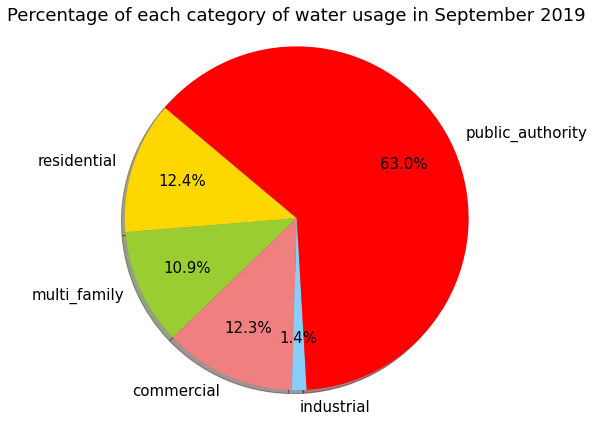

In [11]:
fig, ax = plt.subplots(figsize =(10, 7))
plot(8,ax)

In [12]:
def video(vidname):
    
    month_index = list(range(0,19))
    fig, ax = plt.subplots(figsize =(10, 7))
    def plot_again(month_index):
        plot(month_index,ax)
    anim = FuncAnimation(fig,plot_again,frames = month_index,interval = 1000)
    html = anim.to_html5_video()
    plt.close(fig)
    with open(vidname,"w") as f:
        f.write(html)
        

In [13]:
video("water_usage.html")

In [14]:
# month_index = list(range(0,19))
# fig, ax = plt.subplots(figsize =(10, 7))
# def plot_again(month_index):
#     plot(month_index,ax)
# anim = FuncAnimation(fig,plot_again,frames = month_index,interval = 1000)
# html = anim.to_html5_video()
# plt.close(fig)
# #with open(vidname,"w") as f:
#     #f.write(html)
# HTML(html)